In [1]:
%matplotlib inline
#Amitava Chakraborty - 15th Jun 2019
# Importing standard Qiskit libraries and configuring account
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.exceptions import CircuitError
# pylint: disable=unused-import
from qiskit.extensions.simulator import snapshot

In [2]:
#Depth of an empty circuit
#1. with Register 
q = QuantumRegister(5, 'q')
qc = QuantumCircuit(q)
print(qc.depth())

#2. without Registers
qc = QuantumCircuit(q)
print(qc.depth())

0
0


In [3]:
#With measurement
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q, c)
qc.measure(q, c)
print(qc.depth())

1


In [4]:
#Depth of a simple circuit
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.h(q[4])
qc.cx(q[0], q[1])
qc.cx(q[1], q[4])
qc.cx(q[4], q[2])
qc.cx(q[2], q[3])
print(qc.depth())

#Barriers do not add to depth
qc.barrier()
print(qc.depth())

5
5


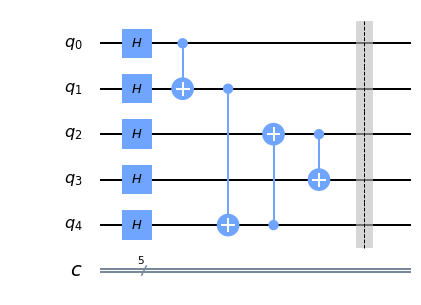

In [5]:
qc.draw('mpl')

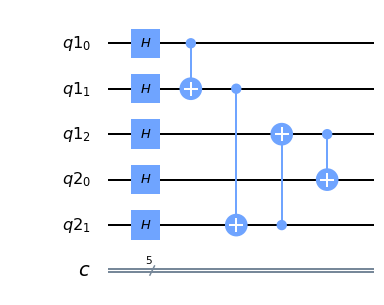

In [6]:
#Depth of a simple circuit
q1 = QuantumRegister(3, 'q1')
q2 = QuantumRegister(2, 'q2')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q1, q2, c)

qc.h(q1[0])
qc.h(q1[1])
qc.h(q1[2])
qc.h(q2[0])
qc.h(q2[1])
qc.cx(q1[0], q1[1])
qc.cx(q1[1], q2[1])
qc.cx(q2[1], q1[2])
qc.cx(q1[2], q2[0])

qc.draw('mpl')

In [7]:
print(qc.depth())

5


In [8]:
qc.ccx(q2[1], q1[0], q2[0])
print(qc.depth())

6


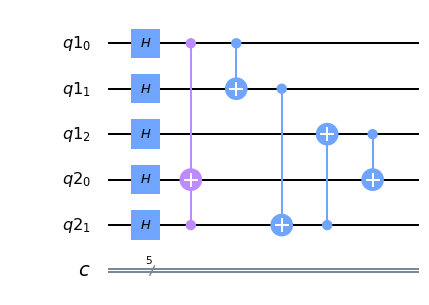

In [9]:
#Depth of a simple circuit
q1 = QuantumRegister(3, 'q1')
q2 = QuantumRegister(2, 'q2')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q1, q2, c)

qc.h(q1[0])
qc.h(q1[1])
qc.h(q1[2])
qc.h(q2[0])
qc.h(q2[1])
qc.ccx(q2[1], q1[0], q2[0])
qc.cx(q1[0], q1[1])
qc.cx(q1[1], q2[1])
qc.cx(q2[1], q1[2])
qc.cx(q1[2], q2[0])

qc.draw('mpl')

In [10]:
print(qc.depth())

6


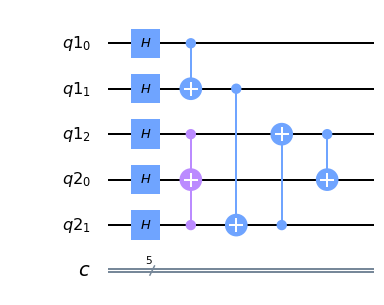

In [11]:
#Depth of a simple circuit
q1 = QuantumRegister(3, 'q1')
q2 = QuantumRegister(2, 'q2')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q1, q2, c)

qc.h(q1[0])
qc.h(q1[1])
qc.h(q1[2])
qc.h(q2[0])
qc.h(q2[1])
qc.ccx(q2[1], q1[2], q2[0])
qc.cx(q1[0], q1[1])
qc.cx(q1[1], q2[1])
qc.cx(q2[1], q1[2])
qc.cx(q1[2], q2[0])

qc.draw('mpl')

In [12]:
print(qc.depth())

5


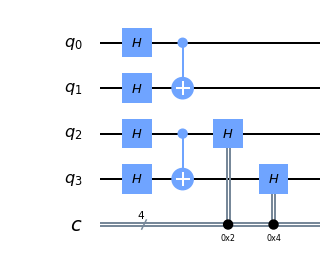

In [19]:
#Circuit Depth with conditional gates
size=4
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.cx(q[0], q[1])
qc.cx(q[2], q[3])
qc.h(q[2]).c_if(c, 2)
qc.h(q[3]).c_if(c, 4)
qc.draw('mpl')

In [20]:
print(qc.depth())

4


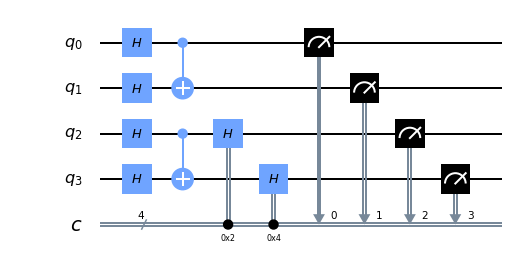

In [21]:
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])
qc.draw('mpl')

In [16]:
print(qc.depth())

5


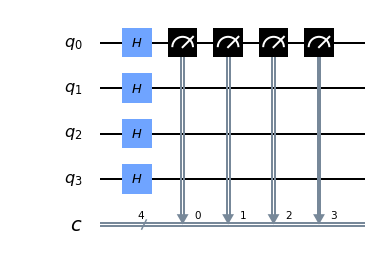

In [22]:
size = 4
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

qc.measure(q[0], c[0])
qc.measure(q[0], c[1])
qc.measure(q[0], c[2])
qc.measure(q[0], c[3])
qc.draw('mpl')        
    

In [23]:
print(qc.depth())

5


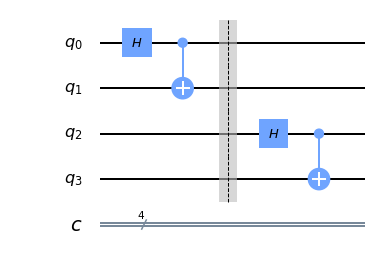

In [31]:
#Depth with barriers
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circ = QuantumCircuit(q, c)
circ.h(0)
circ.cx(0, 1)
circ.barrier(q)
circ.h(2)
circ.cx(2, 3)
circ.draw('mpl')        


In [32]:
print(circ.depth())

4


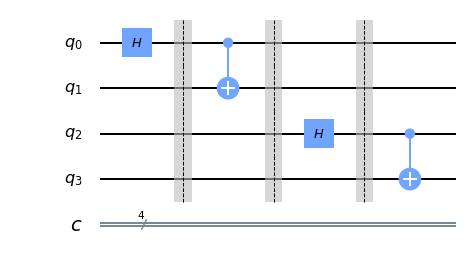

In [33]:
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circ = QuantumCircuit(q, c)
circ.h(0)
circ.barrier(q)
circ.cx(0, 1)
circ.barrier(q)
circ.h(2)
circ.barrier(q)
circ.cx(2, 3)
circ.draw('mpl')        

In [34]:
print(circ.depth())

4


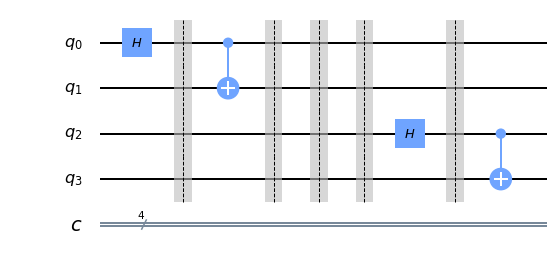

In [35]:
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circ = QuantumCircuit(q, c)
circ.h(0)
circ.barrier(q)
circ.cx(0, 1)
circ.barrier(q)
circ.barrier(q)
circ.barrier(q)
circ.h(2)
circ.barrier(q)
circ.cx(2, 3)
circ.draw('mpl')        

In [36]:
print(circ.depth())

4


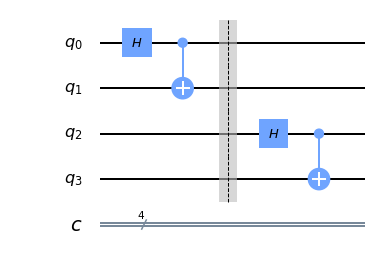

In [37]:
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circ = QuantumCircuit(q, c)
circ.h(0)
circ.cx(0, 1)
circ.snapshot('snap')
circ.h(2)
circ.cx(2, 3)
circ.draw('mpl')        

In [38]:
print(circ.depth())

4


## Circuit Size

In [39]:
size = 4
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)

print(qc.size())


0


In [43]:
# Circuit.size should return 0 for an empty circuit."""
size = 4
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)
print(qc.size())

# Circuit.size should increment for each added single qubit gate
size = 4
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)

qc.h(q[0])
print(qc.size())
qc.h(q[1])
print(qc.depth(),qc.size())

# Circuit.size should increment for each added two qubit gate
size = 4
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)

qc.cx(q[0], q[1])
print(qc.size())
qc.cx(q[2], q[3])
print(qc.depth(), qc.size())

# Circuit.size should not count barriers or snapshots
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.cx(q[0], q[1])
print(qc.size())
qc.barrier(q)
print(qc.size())
qc.snapshot('snapshot_label')
print(qc.size())

0
1
1 2
1
1 2
2
2
2


### Circuit Count Ops

In [8]:
# circuit count ops.
q = QuantumRegister(6, 'q')
qc = QuantumCircuit(q)
qc.h(q)
qc.x(q[1])
qc.y(q[2:4])
qc.z(q[3:])
result = qc.count_ops()
print(result)

OrderedDict([('h', 6), ('z', 3), ('y', 2), ('x', 1)])


### Non Local Gates

In [9]:
# num_nonlocal_gates.
q = QuantumRegister(6, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)
qc.h(q)
qc.x(q[1])
qc.cry(0.1, q[2], q[4])
qc.z(q[3:])
qc.cswap(q[1], q[2], q[3])
qc.iswap(q[0], q[4]).c_if(c, 2)
result = qc.num_nonlocal_gates()
print(result)

3


### Connected Components

In [10]:
# Verify num_connected_components is width for empty
q = QuantumRegister(7, 'q')
qc = QuantumCircuit(q)
print(qc.num_connected_components())

# tensor factors works over multi registers
q1 = QuantumRegister(3, 'q1')
q2 = QuantumRegister(2, 'q2')
qc = QuantumCircuit(q1, q2)
qc.h(q1[0])
qc.h(q1[1])
qc.h(q1[2])
qc.h(q2[0])
qc.h(q2[1])
qc.cx(q1[0], q1[1])
qc.cx(q1[1], q2[1])
qc.cx(q2[1], q1[2])
qc.cx(q1[2], q2[0])
print(qc.num_connected_components())

# tensor factors works over multi registers #2.
q1 = QuantumRegister(3, 'q1')
q2 = QuantumRegister(2, 'q2')
qc = QuantumCircuit(q1, q2)
qc.cx(q1[0], q2[1])
qc.cx(q2[0], q1[2])
qc.cx(q1[1], q2[0])
print(qc.num_connected_components())

# tensor factors works with 2q subspaces.
q1 = QuantumRegister(5, 'q1')
q2 = QuantumRegister(5, 'q2')
qc = QuantumCircuit(q1, q2)
qc.cx(q1[0], q2[4])
qc.cx(q1[1], q2[3])
qc.cx(q1[2], q2[2])
qc.cx(q1[3], q2[1])
qc.cx(q1[4], q2[0])
print(qc.num_connected_components())

# tensor components with classical register.
size = 4
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])
print(qc.num_connected_components())

# tensor components with conditional gate.
size = 4
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.measure(q[0], c[0])
qc.cx(q[0], q[3]).c_if(c, 2)
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])
print(qc.num_connected_components())

7
1
2
5
4
1


### Unitary Factors

In [11]:
# unitary factors empty circuit.
size = 4
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)
print(qc.num_unitary_factors())

# unitary factors multi qregs
q1 = QuantumRegister(2, 'q1')
q2 = QuantumRegister(2, 'q2')
c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(q1, q2, c)
print(qc.num_unitary_factors())

# unitary factors measurements and conditionals.
size = 4
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.cx(q[1], q[2])
qc.cx(q[1], q[2])
qc.cx(q[0], q[3]).c_if(c, 2)
qc.cx(q[0], q[3])
qc.cx(q[0], q[3])
qc.cx(q[0], q[3])
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])
print(qc.num_unitary_factors())

# unitary factors measurements go to same cbit.
size = 5
q = QuantumRegister(size, 'q')
c = ClassicalRegister(size, 'c')
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.measure(q[0], c[0])
qc.measure(q[1], c[0])
qc.measure(q[2], c[0])
qc.measure(q[3], c[0])
print(qc.num_unitary_factors())

4
4
2
5


### Number of Qubits

In [12]:
#Check output in absence of qubits.
c_reg = ClassicalRegister(3)
circ = QuantumCircuit(c_reg)
print(circ.num_qubits)

#Check output in presence of qubits
q_reg = QuantumRegister(4)
c_reg = ClassicalRegister(3)
circ = QuantumCircuit(q_reg, c_reg)
print(circ.num_qubits)

# output for circuits with direct argument for qubits.
circ = QuantumCircuit(5)
print(circ.num_qubits)

# output for circuits with multiple quantum registers.
q_reg1 = QuantumRegister(5)
q_reg2 = QuantumRegister(6)
q_reg3 = QuantumRegister(7)
circ = QuantumCircuit(q_reg1, q_reg2, q_reg3)
print(circ.num_qubits)

0
4
5
18
